<div style="background-image: linear-gradient(to right, #12f024ff, #19da32ff, #1ada33ff); padding: 15px; border-radius: 15px; text-align: center; font-size: 35px; color: black; font-weight: bold; display: flex; align-items: center; justify-content: center;">
    PREDICTIVE AI IMPACT ON JOBS 2030
</div>

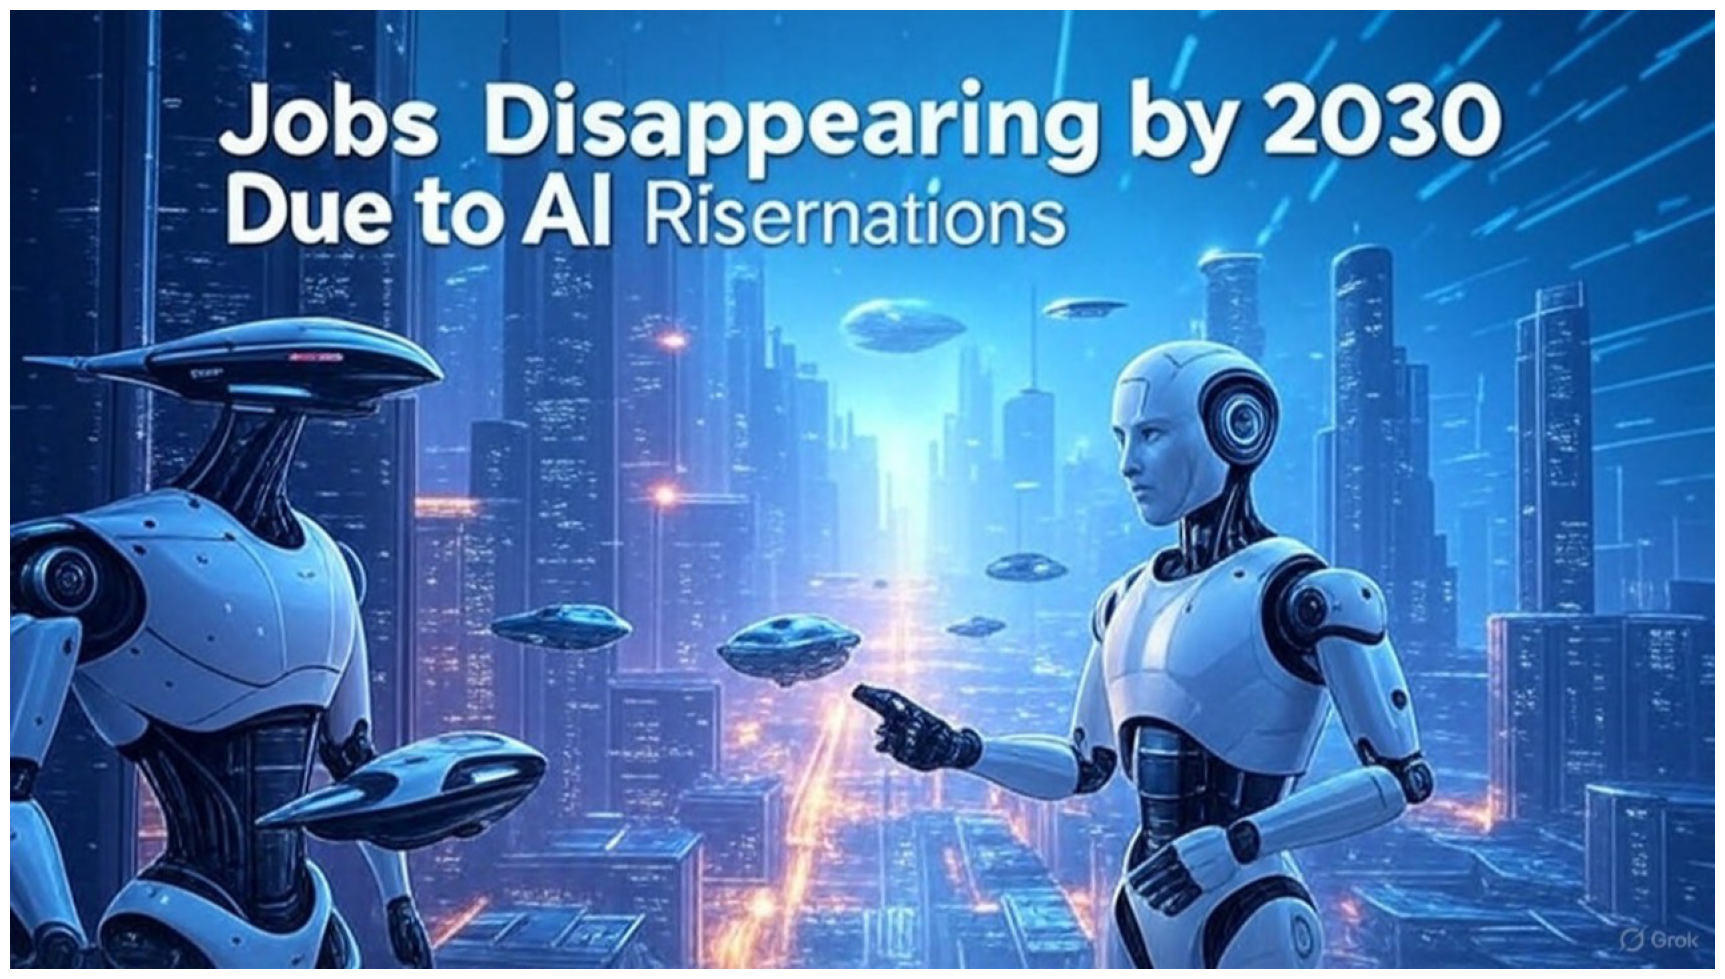

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(r"C:\Users\11\Desktop\jissssssssssssssssssssssssssssssssssssssssssssssssssssssssssshad\ai jobs.jfif")

plt.figure(figsize=(22, 14))   # Bigger = larger image
plt.imshow(img)
plt.axis('off')
plt.show()

<div style="background-image: linear-gradient(to right, #f01212ff, #9b59b6, #20b734ff); padding: 15px; border-radius: 15px; text-align: center; font-size: 35px; color: black; font-weight: bold; display: flex; align-items: center; justify-content: center;">
    IMPORT LIBRARIES
</div>


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from tabulate import tabulate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error


<div style="background-image: linear-gradient(to right, #f01212ff, #9b59b6, #20b734ff); padding: 15px; border-radius: 15px; text-align: center; font-size: 35px; color: black; font-weight: bold; display: flex; align-items: center; justify-content: center;">
    LOAD DATASET
</div>

In [3]:
ai_job=pd.read_csv(r"C:\Users\11\Downloads\AI_Impact_on_Jobs_2030.csv")
ai_job

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Doctor,111319,6,Bachelor's,0.24,1.18,0.20,Low,0.73,0.37,0.99,0.07,0.08,0.92,0.65,0.33,0.76,0.45
2996,UX Researcher,44363,29,PhD,0.65,0.74,0.35,Medium,0.23,0.48,0.05,0.88,0.56,0.29,0.69,0.80,0.61,0.20
2997,Data Scientist,61325,23,Master's,0.64,0.94,0.39,Medium,0.28,0.62,0.73,0.21,0.96,0.01,0.70,0.29,0.48,0.57
2998,Graphic Designer,110296,7,PhD,0.95,1.23,0.46,Medium,0.21,0.18,0.14,0.22,0.55,0.68,0.31,0.55,0.34,0.70


In [4]:
ai_job.columns

Index(['Job_Title', 'Average_Salary', 'Years_Experience', 'Education_Level',
       'AI_Exposure_Index', 'Tech_Growth_Factor',
       'Automation_Probability_2030', 'Risk_Category', 'Skill_1', 'Skill_2',
       'Skill_3', 'Skill_4', 'Skill_5', 'Skill_6', 'Skill_7', 'Skill_8',
       'Skill_9', 'Skill_10'],
      dtype='object')

<div style="background-image: linear-gradient(to right, #f01212ff, #9b59b6, #20b734ff); padding: 15px; border-radius: 15px; text-align: center; font-size: 35px; color: black; font-weight: bold; display: flex; align-items: center; justify-content: center;">
    Check Columns,Shape,Info,Describe
</div>

In [5]:
ai_job.shape

(3000, 18)

In [6]:
ai_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  Skill_6           

In [7]:
ai_job.describe(include='all')

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
count,3000,3000.000000,3000.000000,3000,3000.000000,3000.000000,3000.000000,3000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
unique,20,NaN,NaN,4,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Software Engineer,NaN,NaN,High School,NaN,NaN,NaN,Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,175,NaN,NaN,784,NaN,NaN,NaN,1521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,89372.279000,14.677667,NaN,0.501283,0.995343,0.501503,NaN,0.496973,0.497233,0.499313,0.503667,0.490270,0.499807,0.499160,0.502843,0.501433,0.493627
std,NaN,34608.088767,8.739788,NaN,0.284004,0.287669,0.247881,NaN,0.287888,0.288085,0.288354,0.287063,0.285818,0.286050,0.288044,0.289832,0.285818,0.286464
min,NaN,30030.000000,0.000000,NaN,0.000000,0.500000,0.050000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,58640.000000,7.000000,NaN,0.260000,0.740000,0.310000,NaN,0.240000,0.250000,0.250000,0.260000,0.240000,0.260000,0.250000,0.250000,0.260000,0.250000
50%,NaN,89318.000000,15.000000,NaN,0.500000,1.000000,0.500000,NaN,0.505000,0.500000,0.500000,0.510000,0.490000,0.500000,0.490000,0.500000,0.500000,0.490000
75%,NaN,119086.500000,22.000000,NaN,0.740000,1.240000,0.700000,NaN,0.740000,0.740000,0.750000,0.750000,0.730000,0.740000,0.750000,0.750000,0.740000,0.740000


In [8]:
ai_job.isnull().sum()

Job_Title                      0
Average_Salary                 0
Years_Experience               0
Education_Level                0
AI_Exposure_Index              0
Tech_Growth_Factor             0
Automation_Probability_2030    0
Risk_Category                  0
Skill_1                        0
Skill_2                        0
Skill_3                        0
Skill_4                        0
Skill_5                        0
Skill_6                        0
Skill_7                        0
Skill_8                        0
Skill_9                        0
Skill_10                       0
dtype: int64

In [9]:
for x in ai_job.columns:
    print(f"column:(x)")
    print(ai_job[x].unique())

column:(x)
['Security Guard' 'Research Scientist' 'Construction Worker'
 'Software Engineer' 'Financial Analyst' 'AI Engineer' 'Mechanic'
 'Teacher' 'HR Specialist' 'Customer Support' 'UX Researcher' 'Lawyer'
 'Data Scientist' 'Graphic Designer' 'Retail Worker' 'Doctor'
 'Truck Driver' 'Chef' 'Nurse' 'Marketing Manager']
column:(x)
[ 45795 133355 146216 ...  44363  61325 123909]
column:(x)
[28 20  2 13 22 11 23 12  6 27  9 19 29 15  1 25  7 18  8 24 21  4  5  3
  0 17 10 26 16 14]
column:(x)
["Master's" 'PhD' 'High School' "Bachelor's"]
column:(x)
[0.18 0.62 0.86 0.39 0.52 0.29 0.67 0.2  0.3  0.01 0.5  0.68 0.26 0.89
 0.65 0.97 0.94 0.17 0.55 0.09 0.22 0.08 0.74 0.1  0.16 0.91 0.7  0.93
 0.49 0.82 0.56 0.37 0.19 0.38 0.77 0.98 0.84 0.21 0.99 0.87 0.4  0.43
 0.07 0.71 0.61 0.03 0.11 0.96 0.48 0.6  0.54 0.83 0.63 0.23 0.06 0.59
 0.75 0.69 0.66 0.47 0.42 0.15 0.32 0.13 0.33 0.79 0.28 0.85 0.58 0.12
 0.78 0.73 0.76 0.64 0.27 0.53 0.46 0.24 0.31 0.41 0.04 0.05 0.88 0.
 0.14 0.25 0.9  0.36 0

<div style="background-image: linear-gradient(to right, #f01212ff, #9b59b6, #20b734ff); padding: 15px; border-radius: 15px; text-align: center; font-size: 35px; color: black; font-weight: bold; display: flex; align-items: center; justify-content: center;">
    VISUALISATION
</div>

<div style="background-image: linear-gradient(to right, #f7ff08ff, #ff00ddff); padding: 15px; border-radius: 15px; text-align: center; font-size: 35px; color: transparent; font-weight: bold; background-clip: text; -webkit-background-clip: text;">
    1) UNIVARIATE ANALYSIS
</div>


<div style="background-image: linear-gradient(to right, #f01212ff, #9b59b6, #20b734ff); padding: 15px; border-radius: 15px; text-align: center; font-size: 35px; color: black; font-weight: bold; display: flex; align-items: center; justify-content: center;">
    DISTPLOT
</div>

C:\Users\11\AppData\Local\Temp\ipykernel_15852\4083167560.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ai_job['Years_Experience'],kde=True,bins=10,color='pink')


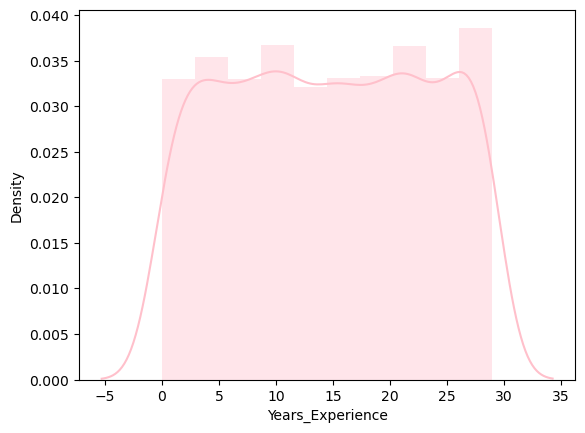

In [10]:
sns.distplot(ai_job['Years_Experience'],kde=True,bins=10,color='pink')
plt.show()

Conclusion:

The plot shows a distribution of years of experience with a combination of a histogram and KDE curve.

The negative values on the x-axis seem unusual, suggesting potential data issues.

The data seems to have a spread with varying levels of experience, and the smooth line of the KDE suggests areas of higher and lower density of experience levels.

<div style="background-image: linear-gradient(to right, #f01212ff, #9b59b6, #20b734ff); padding: 15px; border-radius: 15px; text-align: center; font-size: 35px; color: black; font-weight: bold; display: flex; align-items: center; justify-content: center;">
    COUNTPLOT
</div>

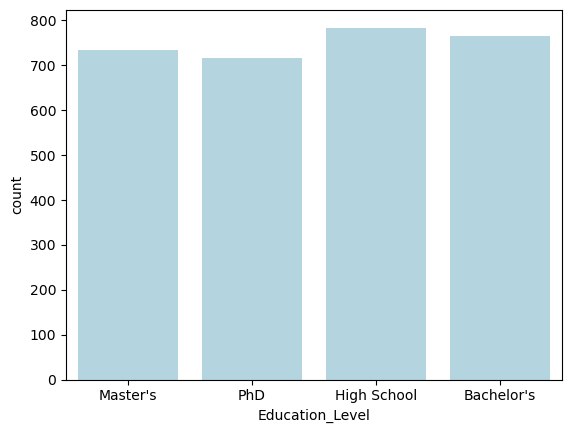

In [11]:
sns.countplot(x='Education_Level',data=ai_job,color="lightblue")
plt.show()

Conclusion:

This bar chart helps to visualize the distribution of individuals by their education level. The data shows a balanced distribution across the four categories, with no significant bias toward any particular education level. This could imply that the dataset includes a diverse group of individuals in terms of their educational backgrounds.

<div style="background-image: linear-gradient(to right, #f7ff08ff, #ff00ddff); padding: 15px; border-radius: 15px; text-align: center; font-size: 35px; color: transparent; font-weight: bold; background-clip: text; -webkit-background-clip: text;">
    2) BIVARIATE ANALYSIS
</div>

<div style="background-image: linear-gradient(to right, #f01212ff, #9b59b6, #20b734ff); padding: 15px; border-radius: 15px; text-align: center; font-size: 35px; color: black; font-weight: bold; display: flex; align-items: center; justify-content: center;">
    BOXPLOT
</div>

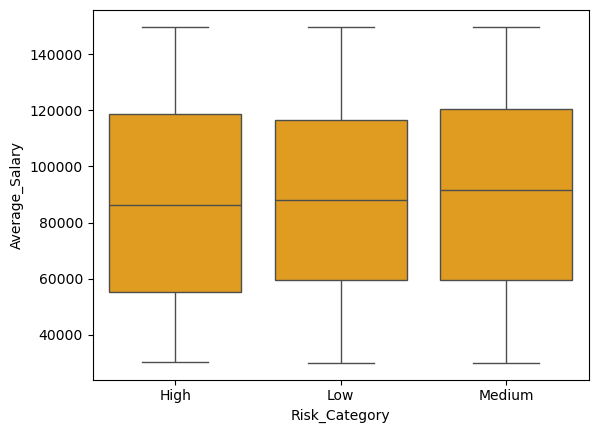

In [12]:
sns.boxplot(x='Risk_Category',y='Average_Salary',data=ai_job,color='orange')
plt.show()

Conclusion:

This box plot suggests that the average salary is fairly consistent across the High, Low, and Medium risk categories. The spread of salaries within each category is also similar, with no visible outliers or extreme variations. This indicates that risk level may not have a significant impact on the average salary for the dataset shown in this plot.

<div style="background-image: linear-gradient(to right, #f01212ff, #9b59b6, #20b734ff); padding: 15px; border-radius: 15px; text-align: center; font-size: 35px; color: black; font-weight: bold; display: flex; align-items: center; justify-content: center;">
    BARPLOT
</div>

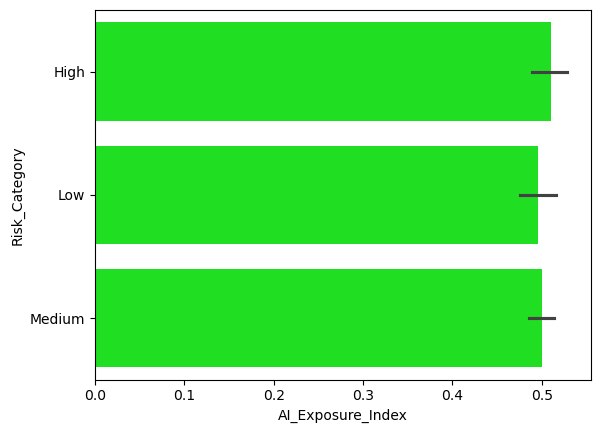

In [13]:
sns.barplot(x='AI_Exposure_Index',y='Risk_Category',data=ai_job,color='#00ff04ea')
plt.show()

Conclusion:

This horizontal bar chart indicates that the AI Exposure Index is relatively consistent across the different Risk Categories (High, Low, and Medium). The data suggests that AI exposure might not be strongly tied to the perceived risk level in this case. All categories seem to have moderate to high exposure to AI.

<div style="background-image: linear-gradient(to right, #f7ff08ff, #ff00ddff); padding: 15px; border-radius: 15px; text-align: center; font-size: 35px; color: transparent; font-weight: bold; background-clip: text; -webkit-background-clip: text;">
    2) MULTIVARIATE ANALYSIS
</div>


<div style="background-image: linear-gradient(to right, #f01212ff, #9b59b6, #20b734ff); padding: 15px; border-radius: 15px; text-align: center; font-size: 35px; color: black; font-weight: bold; display: flex; align-items: center; justify-content: center;">
    HEATMAP
</div>

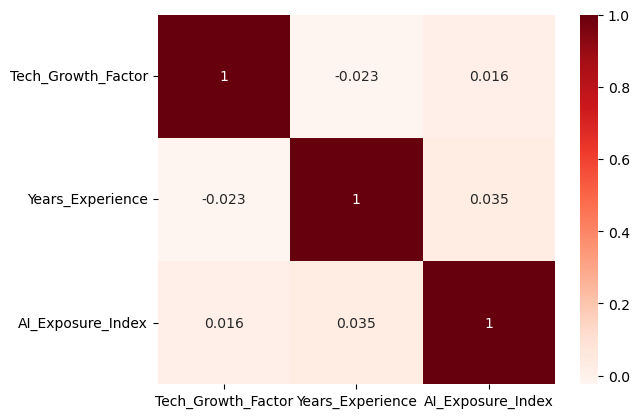

In [14]:
sns.heatmap(ai_job[['Tech_Growth_Factor','Years_Experience','AI_Exposure_Index',]].corr(),annot=True,cmap='Reds')
plt.show()

Conclusion:

This correlation matrix heatmap suggests that the Tech Growth Factor, Years of Experience, and AI Exposure Index are only weakly or not at all related to one another. This could indicate that factors like technological growth or years of experience don't have a significant linear influence on AI exposure or vice versa in this dataset.

In [15]:
ai_job.drop([ 'Skill_1', 'Skill_2',
       'Skill_3', 'Skill_4', 'Skill_5', 'Skill_6', 'Skill_7', 'Skill_8',
       'Skill_9', 'Skill_10'],axis=1,inplace=True)

In [16]:
ai_job

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium
...,...,...,...,...,...,...,...,...
2995,Doctor,111319,6,Bachelor's,0.24,1.18,0.20,Low
2996,UX Researcher,44363,29,PhD,0.65,0.74,0.35,Medium
2997,Data Scientist,61325,23,Master's,0.64,0.94,0.39,Medium
2998,Graphic Designer,110296,7,PhD,0.95,1.23,0.46,Medium


<div style="background-image: linear-gradient(to right, #f01212ff, #9b59b6, #20b734ff); padding: 15px; border-radius: 15px; text-align: center; font-size: 35px; color: black; font-weight: bold; display: flex; align-items: center; justify-content: center;">
    LABEL ENCODING
    
</div>

In [17]:
le=LabelEncoder()

In [18]:
cols=['Job_Title','Risk_Category']
for col in cols:
    ai_job[col]=le.fit_transform(ai_job[col])
ai_job[cols]

,Job_Title,Risk_Category
0,15,0
1,13,1
2,2,0
3,16,2
4,6,2
...,...,...
2995,5,1
2996,19,2
2997,4,2
2998,7,2


In [19]:
ai_job.columns

Index(['Job_Title', 'Average_Salary', 'Years_Experience', 'Education_Level',
       'AI_Exposure_Index', 'Tech_Growth_Factor',
       'Automation_Probability_2030', 'Risk_Category'],
      dtype='object')

In [20]:
ai_job['Tech_Growth_Factor'].unique()

array([1.28, 1.11, 1.18, 0.68, 1.46, 0.51, 1.09, 1.4 , 0.61, 1.01, 0.8 ,
       1.26, 0.52, 1.16, 0.72, 0.89, 1.45, 1.06, 1.08, 1.12, 0.53, 1.05,
       0.99, 0.57, 0.7 , 1.13, 1.36, 0.82, 0.56, 1.21, 0.92, 0.79, 0.96,
       1.47, 1.35, 1.02, 1.27, 1.2 , 0.86, 1.04, 0.85, 0.98, 0.71, 0.73,
       0.91, 1.41, 0.58, 1.24, 0.75, 0.66, 0.74, 0.64, 0.77, 1.37, 0.54,
       1.39, 0.67, 0.76, 1.07, 1.38, 1.48, 1.44, 0.63, 1.29, 0.93, 0.6 ,
       0.9 , 0.95, 1.23, 0.88, 0.69, 0.62, 0.5 , 1.3 , 1.22, 1.19, 0.65,
       1.25, 1.49, 1.  , 1.15, 1.32, 1.1 , 1.33, 1.31, 0.94, 0.81, 0.83,
       1.17, 1.14, 1.43, 0.84, 1.34, 1.5 , 0.59, 1.42, 0.78, 1.03, 0.97,
       0.55, 0.87])

<div style="background-image: linear-gradient(to right, #f01212ff, #9b59b6, #20b734ff); padding: 15px; border-radius: 15px; text-align: center; font-size: 35px; color: black; font-weight: bold; display: flex; align-items: center; justify-content: center;">
    ORDINAL ENCODING
</div>

In [21]:
ai_job['Education_Level'].unique()

array(["Master's", 'PhD', 'High School', "Bachelor's"], dtype=object)

In [22]:
Education_Level=["Master's", 'PhD', 'High School', "Bachelor's"]
oe=OrdinalEncoder(categories=[Education_Level])
ai_job[['Education_Level']] = oe.fit_transform(ai_job[['Education_Level']])


In [23]:
ai_job

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category
0,15,45795,28,0.0,0.18,1.28,0.85,0
1,13,133355,20,1.0,0.62,1.11,0.05,1
2,2,146216,2,2.0,0.86,1.18,0.81,0
3,16,136530,13,1.0,0.39,0.68,0.60,2
4,6,70397,22,2.0,0.52,1.46,0.64,2
...,...,...,...,...,...,...,...,...
2995,5,111319,6,3.0,0.24,1.18,0.20,1
2996,19,44363,29,1.0,0.65,0.74,0.35,2
2997,4,61325,23,0.0,0.64,0.94,0.39,2
2998,7,110296,7,1.0,0.95,1.23,0.46,2


<div style="background-image: linear-gradient(to right, #f01212ff, #9b59b6, #20b734ff); padding: 15px; border-radius: 15px; text-align: center; font-size: 35px; color: black; font-weight: bold; display: flex; align-items: center; justify-content: center;">
    SCALING
</div>

In [24]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(ai_job)

In [25]:
ai_job=pd.DataFrame(scaled_data,columns=ai_job.columns)
ai_job

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category
0,0.906895,-1.259374,1.524586,-1.365573,-1.131450,0.989695,1.406136,-1.521799
1,0.563461,1.271092,0.609079,-0.470897,0.418080,0.398639,-1.821754,-0.314341
2,-1.325427,1.642772,-1.450811,0.423778,1.263278,0.642015,1.244741,-1.521799
3,1.078612,1.362849,-0.191989,-0.470897,-0.391902,-1.096386,0.397420,0.893116
4,-0.638559,-0.548382,0.837956,0.423778,0.065914,1.615519,0.558815,0.893116
...,...,...,...,...,...,...,...,...
2995,-0.810276,0.634256,-0.993058,1.318453,-0.920151,0.642015,-1.216524,-0.314341
2996,1.593764,-1.300759,1.639024,-0.470897,0.523729,-0.887778,-0.611295,0.893116
2997,-0.981993,-0.810561,0.952394,-1.365573,0.488513,-0.192418,-0.449901,0.893116
2998,-0.466842,0.604691,-0.878619,-0.470897,1.580227,0.815855,-0.167460,0.893116


<div style="background-image: linear-gradient(to right, #f01212ff, #9b59b6, #20b734ff); padding: 15px; border-radius: 15px; text-align: center; font-size: 35px; color: black; font-weight: bold; display: flex; align-items: center; justify-content: center;">
    MODEL BUILDING
</div>

In [26]:
x=ai_job.drop('Average_Salary',axis=1)
x

,Job_Title,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category
0,0.906895,1.524586,-1.365573,-1.131450,0.989695,1.406136,-1.521799
1,0.563461,0.609079,-0.470897,0.418080,0.398639,-1.821754,-0.314341
2,-1.325427,-1.450811,0.423778,1.263278,0.642015,1.244741,-1.521799
3,1.078612,-0.191989,-0.470897,-0.391902,-1.096386,0.397420,0.893116
4,-0.638559,0.837956,0.423778,0.065914,1.615519,0.558815,0.893116
...,...,...,...,...,...,...,...
2995,-0.810276,-0.993058,1.318453,-0.920151,0.642015,-1.216524,-0.314341
2996,1.593764,1.639024,-0.470897,0.523729,-0.887778,-0.611295,0.893116
2997,-0.981993,0.952394,-1.365573,0.488513,-0.192418,-0.449901,0.893116
2998,-0.466842,-0.878619,-0.470897,1.580227,0.815855,-0.167460,0.893116


In [27]:
y=ai_job['Average_Salary']
y

0      -1.259374
1       1.271092
2       1.642772
3       1.362849
4      -0.548382
          ...   
2995    0.634256
2996   -1.300759
2997   -0.810561
2998    0.604691
2999    0.998104
Name: Average_Salary, Length: 3000, dtype: float64

In [28]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)

In [29]:
from sklearn.datasets import make_regression

xtrain,ytrain = make_regression(n_samples=100, n_features=7, noise=0.1, random_state=42)
xtest,ytest = make_regression(n_samples=50, n_features=7, noise=0.1, random_state=42)

scaler = StandardScaler()

xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.fit_transform(xtest)

In [30]:
model=LinearRegression()

In [31]:
model=model.fit(xtrain,ytrain)

In [32]:
y_pred=model.predict(xtest)

In [33]:
r2=r2_score(ytest,y_pred)
r2

0.6683322345731388

In [34]:
new_data = [[0.906895, 1.524586, -1.365573, -1.131450, 0.989695, 1.406136, -1.521799]]

predicted_value = model.predict(new_data)

print(f"Predicted Value: {predicted_value}")


Predicted Value: [176.40018502]


In [35]:
predicted_value

array([176.40018502])

<div style="background-image: linear-gradient(to right, #f01212ff, #9b59b6, #20b734ff); padding: 15px; border-radius: 15px; text-align: center; font-size: 35px; color: black; font-weight: bold; display: flex; align-items: center; justify-content: center;">
    RANDOM FOREST
</div>

In [36]:
rr_reg=RandomForestRegressor(n_estimators=100, random_state=42)

In [37]:
rr_reg.fit(xtrain,ytrain)

RandomForestRegressor(random_state=42)

In [38]:
yrf_pred=rr_reg.predict(xtest)

In [39]:
r21=r2_score(ytest, yrf_pred)

In [40]:
r21

0.28774034170136686

<div style="background-image: linear-gradient(to right, #f01212ff, #9b59b6, #20b734ff); padding: 15px; border-radius: 15px; text-align: center; font-size: 35px; color: black; font-weight: bold; display: flex; align-items: center; justify-content: center;">
    DECISION TREE
</div>

In [41]:
dt_reg=DecisionTreeRegressor()

In [42]:
dt_reg.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [43]:
y_pred1=rr_reg.predict(xtest)

In [44]:
r22=r2_score(ytest,y_pred1)

In [45]:
r22

0.28774034170136686

<div style="background-image: linear-gradient(to right, #f01212ff, #9b59b6, #20b734ff); padding: 15px; border-radius: 15px; text-align: center; font-size: 35px; color: black; font-weight: bold; display: flex; align-items: center; justify-content: center;">
    SUPORT VECTOR MECHINE

</div>

In [46]:
svrl=SVR(kernel="linear")

In [47]:
svrl=svrl.fit(xtrain, ytrain)

In [48]:
yl_pred=svrl.predict(xtest)

In [49]:
r23=r2_score(ytest,yl_pred)

In [50]:
r23

0.5394949645843933

In [51]:
svcr=SVR(kernel="rbf")

In [52]:
svcr=svcr.fit(xtrain,ytrain)

In [53]:
yr_pred=svrl.predict(xtest)

In [54]:
r24=r2_score(ytest,yr_pred)

In [55]:
r24

0.5394949645843933

<div style="background-image: linear-gradient(to right, #f01212ff, #9b59b6, #20b734ff); padding: 15px; border-radius: 15px; text-align: center; font-size: 35px; color: black; font-weight: bold; display: flex; align-items: center; justify-content: center;">
    L2 REGULARAIZATION
</div>

In [56]:
model2=Ridge(alpha=1.0)

In [57]:
model2.fit(xtrain,ytrain)

Ridge()

In [58]:
y_pred2=model2.predict(xtest)

In [59]:
r2r=r2_score(ytest,y_pred2)

In [60]:
r2r

0.6680137395642343

<div style="background-image: linear-gradient(to right, #f01212ff, #9b59b6, #20b734ff); padding: 15px; border-radius: 15px; text-align: center; font-size: 35px; color: black; font-weight: bold; display: flex; align-items: center; justify-content: center;">
    L1 REGULARAIZATION
</div>

In [61]:
model3=Lasso(alpha=0.1)

In [62]:
model3.fit(xtrain,ytrain)

Lasso(alpha=0.1)

In [63]:
y_pred3=model3.predict(xtest)

In [64]:
r2r

0.6680137395642343

<div style="background-image: linear-gradient(to right, #f01212ff, #9b59b6, #20b734ff); padding: 15px; border-radius: 15px; text-align: center; font-size: 35px; color: black; font-weight: bold; display: flex; align-items: center; justify-content: center;">
    KNN
</div>

In [65]:
metric_k=[]
neighbors=np.arange(3,15)

In [66]:
for k in neighbors:
    classifier=KNeighborsRegressor(n_neighbors=k,metric='euclidean')
    classifier.fit(xtrain,ytrain)
    y_prediction=classifier.predict(xtest)
    r2=r2_score(ytest, y_prediction)
    metric_k.append(r2)

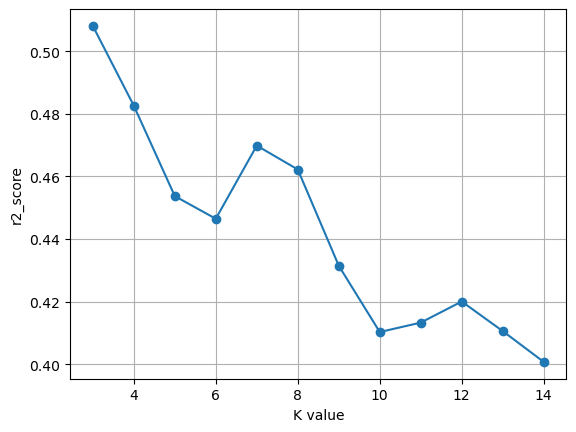

In [67]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K value')
plt.ylabel('r2_score')
plt.grid()
plt.show()

In [68]:
Reggrossor=KNeighborsRegressor(n_neighbors=10,metric='euclidean')
knn=Reggrossor.fit(xtrain,ytrain)
y_prediction=Reggrossor.predict(xtest)

In [69]:
knn_r2=r2_score(ytest,y_prediction)
knn_r2

0.4103021416278624

<div style="background-image: linear-gradient(to right, #f01212ff, #9b59b6, #20b734ff); padding: 15px; border-radius: 15px; text-align: center; font-size: 35px; color: black; font-weight: bold; display: flex; align-items: center; justify-content: center;">
    XGBOOST
</div>

In [70]:
model_xg=XGBRegressor()

In [71]:
model_xg=model.fit(xtrain,ytrain)

In [72]:
yxg_pred=model.predict(xtest)

In [73]:
r2xg=r2_score(ytest,yxg_pred)

In [74]:
r2xg

0.6683322345731388

<div style="background-image: linear-gradient(to right, #f01212ff, #9b59b6, #20b734ff); padding: 15px; border-radius: 15px; text-align: center; font-size: 35px; color: black; font-weight: bold; display: flex; align-items: center; justify-content: center;">
    CATBOOST
</div>

In [75]:
model_c=CatBoostRegressor()

In [76]:
model_c=model.fit(xtrain,ytrain)

In [77]:
yc_pred=model.predict(xtest)

In [78]:
r2c=r2_score(ytest,yc_pred)

In [79]:
r2c

0.6683322345731388

<div style="background-image: linear-gradient(to right, #f01212ff, #9b59b6, #20b734ff); padding: 15px; border-radius: 15px; text-align: center; font-size: 35px; color: black; font-weight: bold; display: flex; align-items: center; justify-content: center;">
    LIGHTGBM
</div>


In [80]:
modelgb=lgb.LGBMRegressor(verbose=0)

In [81]:
modelgb=model.fit(xtrain,ytrain)

In [82]:
ygb_pred=model.predict(xtest)

In [83]:
r2gb=r2_score(ytest,ygb_pred)

In [84]:
r2gb

0.6683322345731388

In [85]:
mse=mean_squared_error(ytest,y_pred)

In [86]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score 
rmse = np.sqrt(mse)


In [87]:
rmse

77.39906893665942

In [88]:

table = [['Model', 'Score'],
         ['Linear Regression', r2],
         ['KNN', knn_r2],
         ['Random Forest', r21],
         ['SVR', r24],
         ['Decision Tree', r22],
         ['XGB', r2xg],
         ['CatBoost', r2c],
         ['LGBM', r2gb]]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════════╤══════════╕
│ Model             │    Score │
╞═══════════════════╪══════════╡
│ Linear Regression │ 0.400752 │
├───────────────────┼──────────┤
│ KNN               │ 0.410302 │
├───────────────────┼──────────┤
│ Random Forest     │ 0.28774  │
├───────────────────┼──────────┤
│ SVR               │ 0.539495 │
├───────────────────┼──────────┤
│ Decision Tree     │ 0.28774  │
├───────────────────┼──────────┤
│ XGB               │ 0.668332 │
├───────────────────┼──────────┤
│ CatBoost          │ 0.668332 │
├───────────────────┼──────────┤
│ LGBM              │ 0.668332 │
╘═══════════════════╧══════════╛


<div style="background-image: linear-gradient(to right, #f01212ff, #9b59b6, #20b734ff); padding: 15px; border-radius: 15px; text-align: center; font-size: 35px; color: black; font-weight: bold; display: flex; align-items: center; justify-content: center;">
    HYPER PARAMETER TUNING
</div>


In [89]:

model = CatBoostRegressor(verbose=0)  

param_distributions = {
    'iterations': [500, 1000, 1500],          
    'learning_rate': [0.01, 0.05, 0.1],      
    'depth': [5, 6, 7, 8],                    
    'l2_leaf_reg': [1, 3, 5, 10],             
    'eval_metric': ['RMSE'],                  
    'random_strength': [1, 3, 5],             
    'bagging_temperature': [0, 0.5, 1],        
}

random_search = RandomizedSearchCV(
    estimator=model,                        
    param_distributions=param_distributions, 
    n_iter=50,                              
    scoring='neg_root_mean_squared_error',   
    cv=3,                                   
    verbose=2,                               
    random_state=42,                         
    n_jobs=-1                                
)

random_search.fit(xtrain, ytrain)  

print("Best Hyperparameters:", random_search.best_params_)

best_model = random_search.best_estimator_

y_pred = best_model.predict(xtest)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters: {'random_strength': 1, 'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 500, 'eval_metric': 'RMSE', 'depth': 5, 'bagging_temperature': 0.5}
Mean Squared Error on Test Set: 8602.038924138737


In [90]:
model_cat = CatBoostRegressor(
    verbose=0,                    
    learning_rate=0.05,           
    l2_leaf_reg=3,                
    iterations=1000,              
    eval_metric='RMSE',           
    depth=5,                      
    bagging_temperature=1        
)

In [91]:
model_cat.fit(xtrain,ytrain)

In [92]:
y_cats=model_cat.predict(xtest)

In [93]:
r2_cats=r2_score(ytest,y_cats)
r2_cats

0.5449296217642681

<div style="background-image: linear-gradient(to right, #f01212ff, #9b59b6, #20b734ff); padding: 15px; border-radius: 15px; text-align: center; font-size: 35px; color: black; font-weight: bold; display: flex; align-items: center; justify-content: center;">
    PREDICTION
</div>


In [94]:
neww_data = [['Security Guard',45795,28,'Masters',0.18,1.28,0.85,'High']]

predicted = model_cat.predict(neww_data)

print(f"Predicted: {predicted}")


CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=0]="Security Guard": Cannot convert 'Security Guard' to float